<a href="https://colab.research.google.com/github/wasimarish/Target_MySql/blob/main/Netflix_Case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Business Problem**
Analyze the data and generate insights that could help Netflix in deciding which type of shows/movies to produce and how they can grow the business in different countries.


# Netflix Dataset

Netflix is one of the most popular media and video streaming platforms. They have over 8000 movies or tv shows available on their platform, as of mid-2021, they have over 200M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

# The dataset consists of a list of all the TV shows/movies available on Netflix:

Show_id: Unique ID for every Movie / Tv Show

Type: Identifier - A Movie or TV Show

Title: Title of the Movie / Tv Show

Director: Director of the Movie

Cast: Actors involved in the movie/show

Country: Country where the movie/show was produced

Date_added: Date it was added on Netflix

Release_year: Actual Release year of the movie/show

Rating: TV Rating of the movie/show

Duration: Total Duration - in minutes or number of seasons

Listed_in: Genre

Description: The summary description

# Objectives of the Project

Perform EDA on the given dataset and find insights.
Provide Useful Insights and Business recommendations that can help the business to grow.

# Importing necessary Library Loading the Data and Basic Observation

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('drive/MyDrive/netflix.csv')

In [77]:
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


# We can see that there is null in the columns

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [79]:
df.isnull().sum()

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


# Here is the Null Value Counts and there Null Value Rates

In [80]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]

    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns


missing_value_table(df)


            Null Value Count Null Value Rates
duration                   3           % 0.03
rating                     4           % 0.05
date_added                10           % 0.11
cast                     825           % 9.37
country                  831           % 9.44
director                2634          % 29.91


# Below Cell is used for fill up the NaN values / Handling MIssing Values

In [81]:
#Since cast we don't know fill with Unknown
df['cast'] = df['cast'].fillna('Unknown')

#Rating can be filled with mode value
df['rating'] = df['rating'].fillna(df['rating'].mode()[0])

#Most movies or Duration have almost same season and time here also we use mode
def fill_null(df):
  if df['type']=='Movie':
    return df['duration'].mode()[0]
  elif df['type']=='TV Show':
    return df['duration'].mode()[1]

df['duration']=df['duration'].fillna(value=fill_null)

#Most movies launch around same date so mode of time column ti fill missing values
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])

#For Country we use Unknown
df['country'] = df['country'].fillna('Unknown')

#For Director in place NaN we place most fequent director from that specific country
director_mode = (
    df[df['director'].notna()]
    .groupby('country')['director']
    .agg(lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown')
)

df['director'] = df.apply(
    lambda row: director_mode.get(row['country'], 'Unknown') if pd.isna(row['director']) else row['director'],
    axis=1
)


# Again checking the NaN values in the columns, here we can say all the NaN values are dealt with .

In [82]:
def missing_value_table(df, get_null_columns=False):
    # find columns that only have null values
    null_columns = [col for col in df.columns
                    if df[col].isnull().sum() > 0]

    # Null Value counts
    null_counts = df[null_columns].isnull().sum().sort_values(ascending=True)

    # Null Value Percentage
    null_value_rates = (df[null_columns].isnull().sum() / df.shape[0] * 100).sort_values(ascending=True)
    formatted_null_value_rates = null_value_rates.apply(lambda value: f"% {str(np.round(value, 2))}")

    # Null Value Table
    null_df = pd.concat([null_counts, formatted_null_value_rates],
                        axis=1, keys=["Null Value Count", "Null Value Rates"])
    print(null_df, end="\n")

    if get_null_columns:
        return null_columns


missing_value_table(df)


Empty DataFrame
Columns: [Null Value Count, Null Value Rates]
Index: []


# Below Cell is for Copying **DF**

In [83]:
or_df=df
#this is for analysis on direector
dir_df=df
#country based analysis
cr_df=df
#for time-based analysis
tb_df=df
#for rating
rt_df=df

# Percentage Ratio Of Movie and Tv_Show in the Dataset

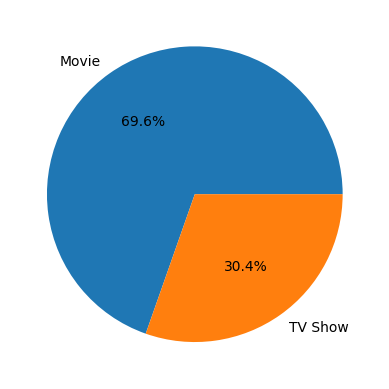

In [84]:
movie_count=df['type'].value_counts()
label=movie_count.index
data=movie_count.values
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.show()

# Plot shows Number of Tv Shows or Movies released by Year

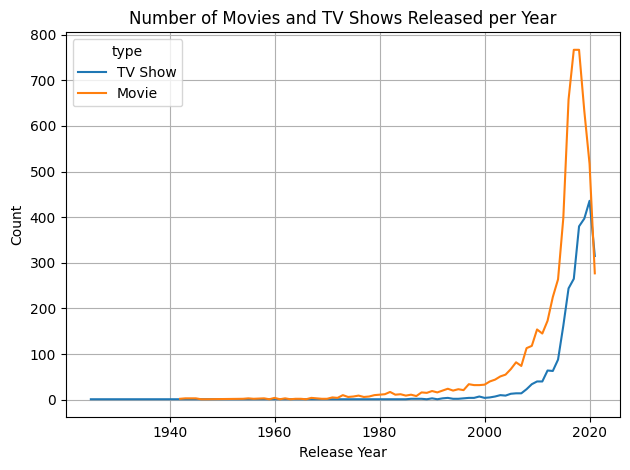

In [85]:
x = df.groupby(['release_year', 'type']).size().reset_index(name='count')
y=x.sort_values(by='release_year')
sns.lineplot(data=y,x='release_year',y='count',hue='type')
plt.title('Number of Movies and TV Shows Released per Year')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# Date added is in string .So to convert it into DateTime Data type

In [86]:
# Remove leading/trailing spaces
df['date_added'] = df['date_added'].str.strip()
# Convert
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

In [87]:
df['n_added_year']=df['date_added'].dt.year.astype(int)

# From Plot we can understand that after year 2015 Most of the Titles are Added to Netflix and there is sudden decrease in addition of movie and Tv Shows 2017 and 2020 respectively

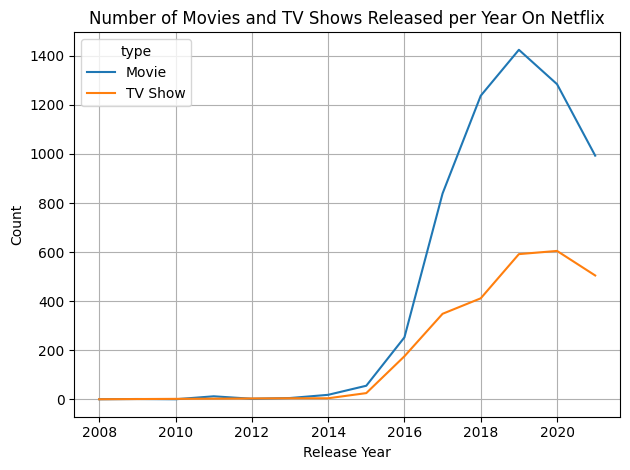

In [88]:
x = df.groupby(['n_added_year', 'type']).size().reset_index(name='count')


y=x.sort_values(by='n_added_year')
sns.lineplot(data=y,x='n_added_year',y='count',hue='type')
plt.title('Number of Movies and TV Shows Released per Year On Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

## Here is the Number of Titles released by Year .From this we can see that from 1975 Movies released started and is in uphill trend till 2020 and after this there is decline.
# For Tv Shows released started from around 2000 and is in uphill trend till 2020 and there is decline

In [89]:
d = df.groupby(['type' , 'release_year'])['show_id'].count().reset_index()
d.rename({'show_id' : 'total movies/TV shows'}, axis = 1 , inplace = True)
d

,type,release_year,total movies/TV shows
0,Movie,1942,2
1,Movie,1943,3
2,Movie,1944,3
3,Movie,1945,3
4,Movie,1946,1
...,...,...,...
114,TV Show,2017,265
115,TV Show,2018,380
116,TV Show,2019,397
117,TV Show,2020,436


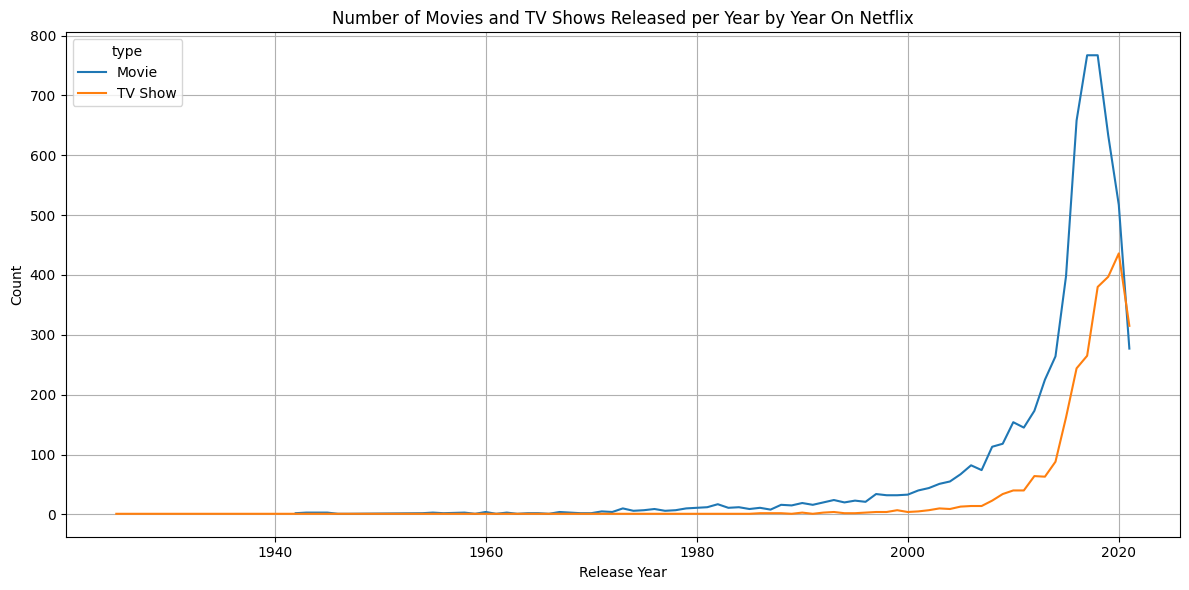

In [90]:
plt.figure(figsize = (12,6))
sns.lineplot(data=d,x='release_year',y='total movies/TV shows',hue='type')
plt.title('Number of Movies and TV Shows Released per Year by Year On Netflix')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

# **Genre Analysis**

Most common genres globally.

Genre trends by country or year.

Top genres for Movies vs. TV Shows.

# Exploding Gnre colum as it is nesting


In [91]:
df['list_of_genre']=df['listed_in'].apply(lambda x: str(x).split(', ') if pd.notna(x) else [])
df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,n_added_year,list_of_genre
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,[Documentaries]
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,"[International TV Shows, TV Dramas, TV Mysteries]"
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,"[Crime TV Shows, International TV Shows, TV Ac..."


In [92]:
df=df.explode('list_of_genre')

# **Famous Genre of title **

In [93]:
common_genre=df.groupby('list_of_genre')['title'].nunique().sort_values(ascending=False)
common_genre.head(5)

,title
list_of_genre,
International Movies,2752
Dramas,2427
Comedies,1674
International TV Shows,1351
Documentaries,869


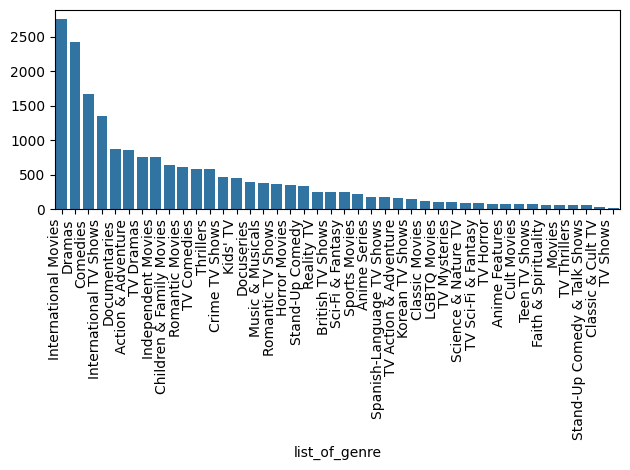

In [94]:
sns.barplot(x=common_genre.index, y=common_genre.values)
plt.xticks(rotation=90, ha='right')
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [95]:
# Genre trends by country or year.
df['list_of_country']=df['country'].apply(lambda x: str(x).split(', '))
df=df.explode('list_of_country')

# Famous Genre By Country
**Top 5 countries focus heavily on diverse genres, with consistent dominance in Drama and International content across all regions.**

In [96]:
df = df[df['list_of_country'] != 'Unknown']
top_genre = df['list_of_genre'].value_counts().head(5).index
top_countries = df['list_of_country'].value_counts().head(5).index

# Step 2: Filter rows where both genre and country are in the top lists
filtered_df = df[(df['list_of_genre'].isin(top_genre)) & (df['list_of_country'].isin(top_countries))]

# Step 3: Group by genre and country, and count unique titles
groupeds = filtered_df.groupby(['list_of_genre', 'list_of_country'])['title'].nunique().reset_index()

# Step 4: Sort by count of titles
groupeds = groupeds.sort_values(by='title', ascending=False)

# Step 5: Show top results
groupeds.head(10)


,list_of_genre,list_of_country,title
17,International Movies,India,864
14,Dramas,United States,835
9,Comedies,United States,680
12,Dramas,India,662
4,Action & Adventure,United States,404
7,Comedies,India,323
16,International Movies,France,207
13,Dramas,United Kingdom,196
18,International Movies,United Kingdom,168
11,Dramas,France,167


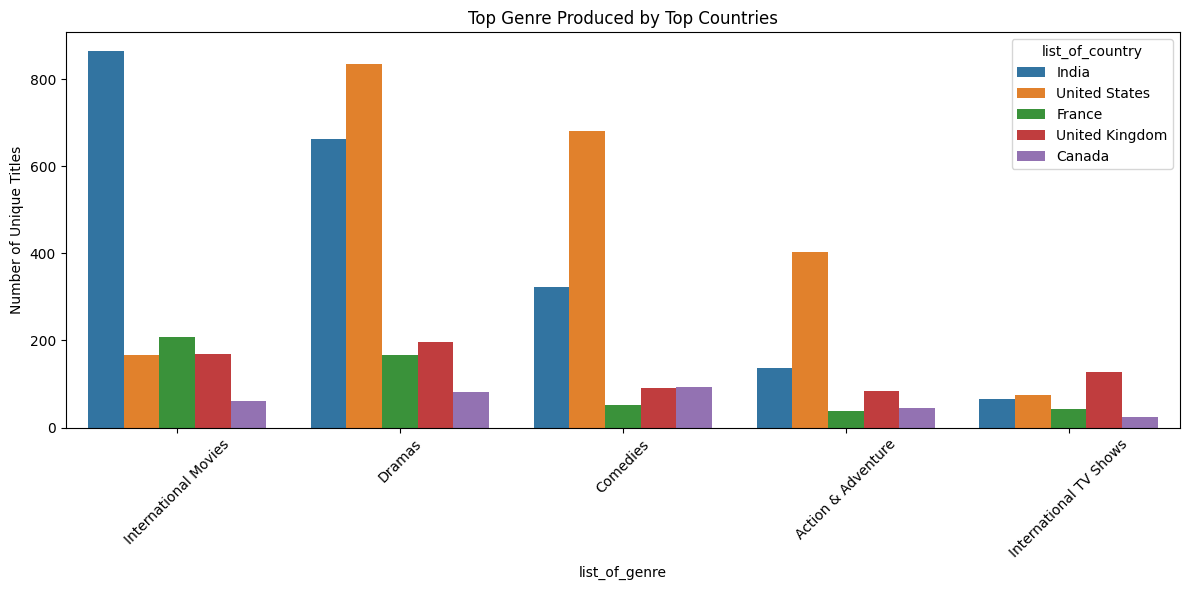

In [97]:
plt.figure(figsize=(12, 6))
sns.barplot(data=groupeds, x='list_of_genre', y='title', hue='list_of_country')
plt.xticks(rotation=45)
plt.ylabel('Number of Unique Titles')
plt.title('Top Genre Produced by Top Countries')
plt.tight_layout()
plt.show()

The graph shows a sharp rise in Neflix content after 2010, with International Movies leading. All selected genres peaked around 2019–2020, followed by a notable decline post-2021.

In [98]:
# Genre trends by country or year.
genre_year=df.groupby(['list_of_genre','release_year'])['title'].nunique().sort_values(ascending=False)
genre_year.head(7)

list_of_genre         release_year
International Movies  2018            318
                      2017            310
                      2016            297
Dramas                2018            288
                      2017            274
                      2016            264
International Movies  2019            253
Name: title, dtype: int64

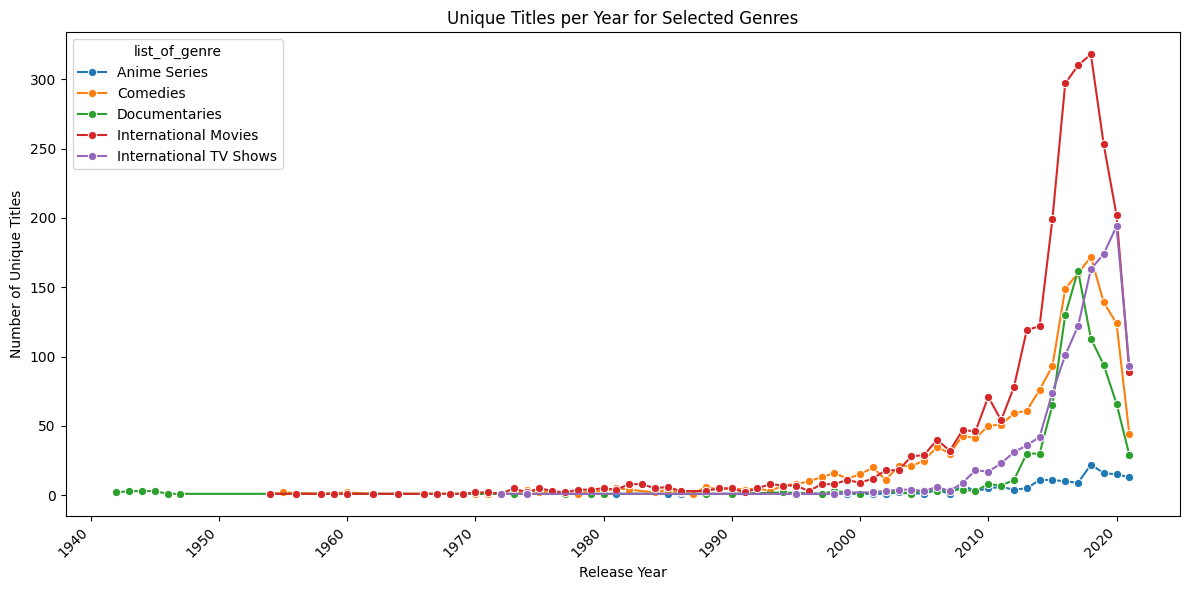

In [99]:
selected_genres = ['International Movies','International TV Shows','Anime Series','Comedies','Documentaries']
genre_year_filtered = df[df['list_of_genre'].isin(selected_genres)]
genre_year_counts = genre_year_filtered.groupby(['list_of_genre', 'release_year'])['title'].nunique().reset_index()
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='release_year', y='title', hue='list_of_genre', data=genre_year_counts, marker='o')
plt.title(f'Unique Titles per Year for Selected Genres')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# From 2016 to 2019, all selected genres surged in releases, with International Movies dominating. Post-2019, there's a gradual decline, especially in Comedies and International TV Shows. Anime growth remained modest.

In [100]:
genre_year=df.groupby(['list_of_genre','n_added_year'])['title'].nunique().sort_values(ascending=False)
genre_year.head(7)

list_of_genre         n_added_year
International Movies  2018            655
                      2019            574
Dramas                2019            547
International Movies  2020            546
Dramas                2020            523
                      2018            523
Comedies              2020            399
Name: title, dtype: int64

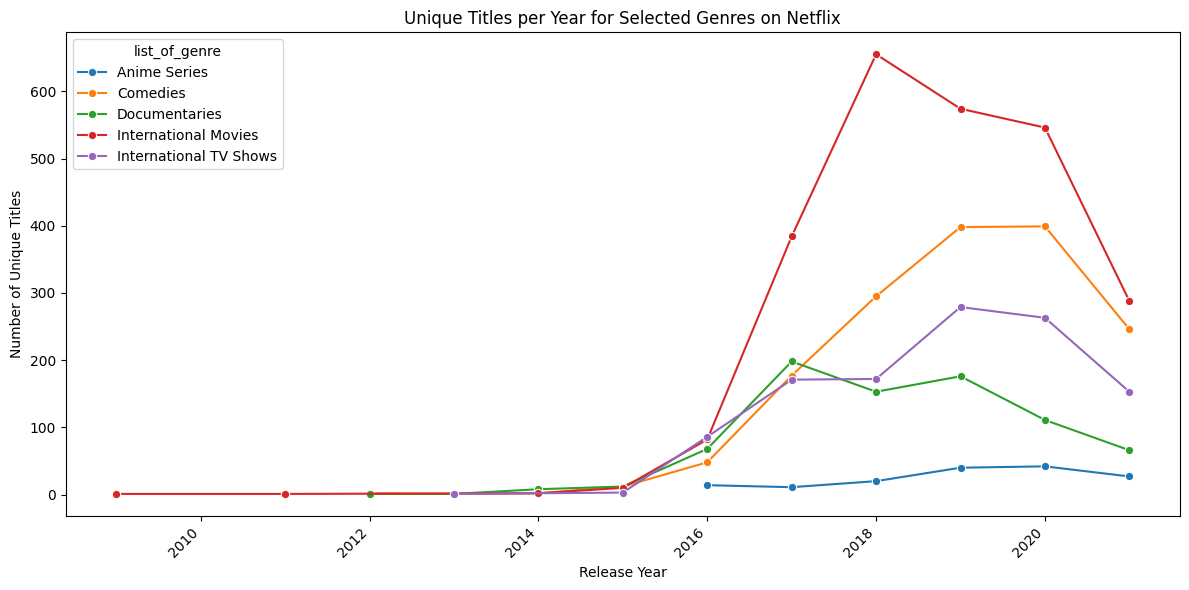

In [101]:
selected_genres = ['International Movies','International TV Shows','Anime Series','Comedies','Documentaries']
genre_year_filtered = df[df['list_of_genre'].isin(selected_genres)]
genre_year_counts = genre_year_filtered.groupby(['list_of_genre', 'n_added_year'])['title'].nunique().reset_index()
# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(x='n_added_year', y='title', hue='list_of_genre', data=genre_year_counts, marker='o')
plt.title(f'Unique Titles per Year for Selected Genres on Netflix')
plt.xlabel('Release Year')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# International genres dominate both movies and TV shows. Dramas, comedies, and documentaries are widely popular. TV genres show diverse interests, while anime remains niche despite its growing global fanbase.

# Top genres for Movies vs. TV Shows.

<ipython-input-102-a078f5e7171b>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_movie_genres, x="title", y="list_of_genre", ax=axes[0], palette="Blues_d")
<ipython-input-102-a078f5e7171b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_tv_genres, x="title", y="list_of_genre", ax=axes[1], palette="Greens_d")


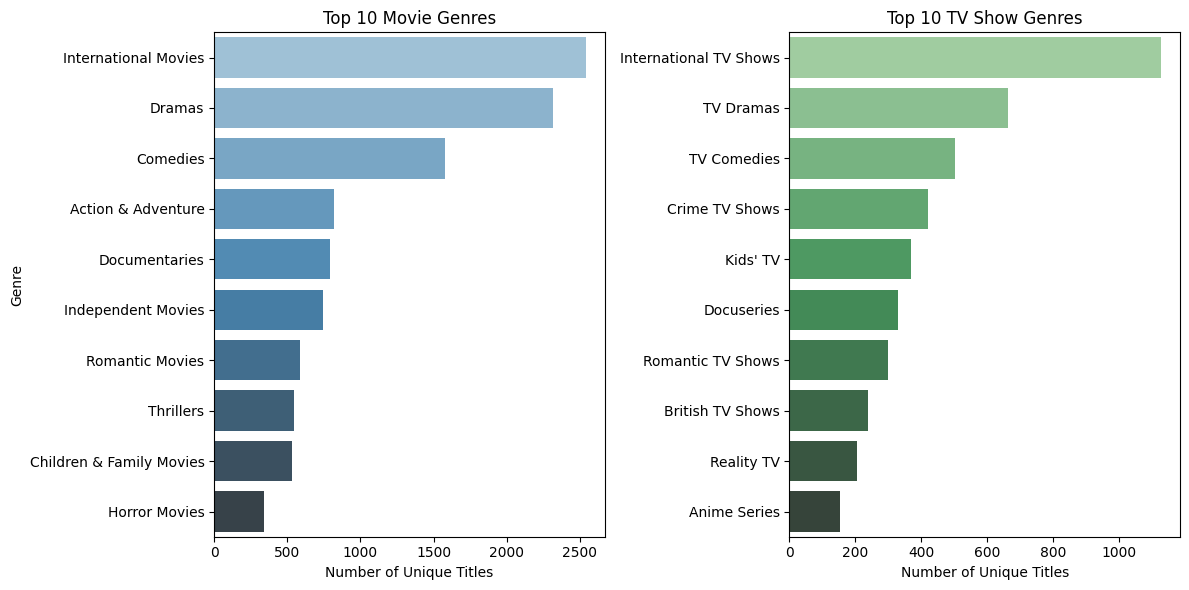

In [102]:
genre_by_type = df.groupby(['type', 'list_of_genre'])['title'].nunique().reset_index()
# Get top 10 genres for Movies and TV Shows separately
top_movie_genres = genre_by_type[genre_by_type["type"] == "Movie"].sort_values("title", ascending=False).head(10)
top_tv_genres = genre_by_type[genre_by_type["type"] == "TV Show"].sort_values("title", ascending=False).head(10)
# Plotting the results
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=False)

sns.barplot(data=top_movie_genres, x="title", y="list_of_genre", ax=axes[0], palette="Blues_d")
axes[0].set_title("Top 10 Movie Genres")
axes[0].set_xlabel("Number of Unique Titles")
axes[0].set_ylabel("Genre")

sns.barplot(data=top_tv_genres, x="title", y="list_of_genre", ax=axes[1], palette="Greens_d")
axes[1].set_title("Top 10 TV Show Genres")
axes[1].set_xlabel("Number of Unique Titles")
axes[1].set_ylabel("")

plt.tight_layout()
plt.show()

# **Analysis On Director**

Most frequent directors.

Actors appearing most often.

Collaborations: top actor-director pairs.

# Number of Titles Directed by Director

In [103]:
director_counts=dir_df['director'].value_counts()
director_counts.head(5)

,count
director,
Marcus Raboy,786
Rajiv Chilaka,428
Edward Cotterill,211
Toshiya Shinohara,167
Park Hoon-jung,152


<ipython-input-104-4380bf510f5b>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')


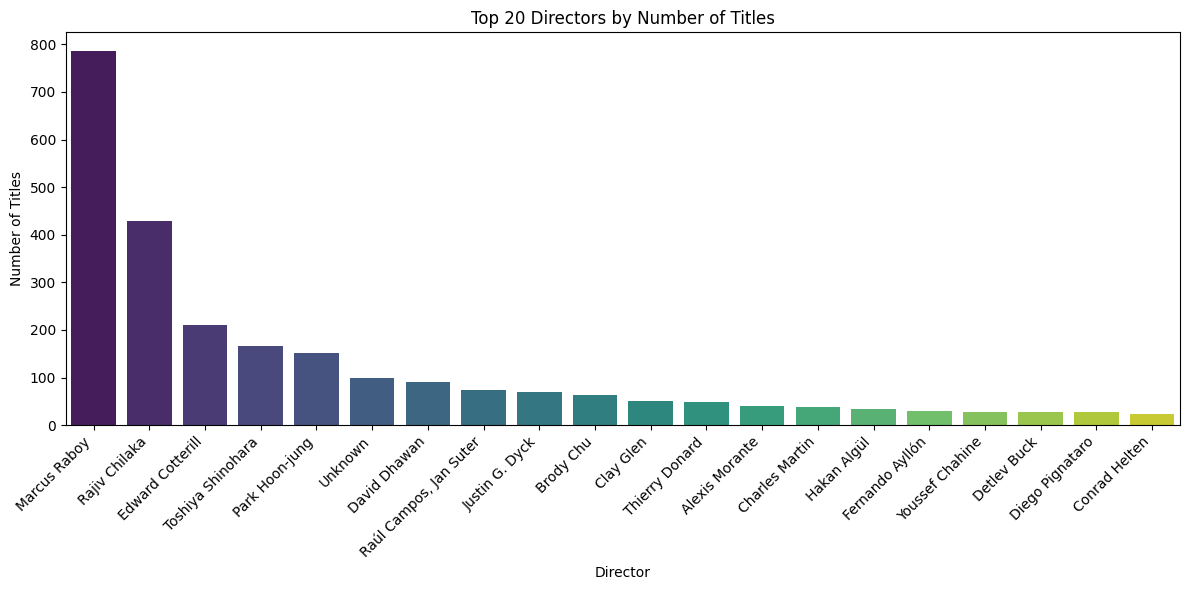

In [104]:
top_n = 20
top_directors = director_counts.head(top_n)

# Create the bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_directors.index, y=top_directors.values, palette='viridis')
plt.title(f'Top {top_n} Directors by Number of Titles')
plt.xlabel('Director')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [105]:
dir_df['list_of_cast']=dir_df['cast'].apply(lambda x: str(x).split(', '))
dir_df=dir_df.explode('list_of_cast')

In [106]:
actor_director_pair_counts = dir_df.groupby(['list_of_cast', 'director']).size().reset_index(name='count')
actor_director_pair_counts = actor_director_pair_counts.sort_values(by='count', ascending=False)
actor_director_pair_counts

,list_of_cast,director,count
55396,Unknown,Marcus Raboy,131
55480,Unknown,Rajiv Chilaka,98
55232,Unknown,Edward Cotterill,40
52474,Takahiro Sakurai,Toshiya Shinohara,21
27028,Julie Tejwani,Rajiv Chilaka,20
...,...,...,...
20248,Helena Bonham Carter,Ivan Silvestrini,1
20249,Helena Bonham Carter,James Ivory,1
20250,Helena Bonham Carter,McG,1
20251,Helena Bonham Carter,Sarah Gavron,1


# The top 10 actor-director collaborations on Netflix, ranked by the number of collaborations. Yuichi Nakamura & Toshiya Shinohara have the most, followed by Takahiro Sakurai & Toshiya Shinohara.

<ipython-input-107-64f21a971e7f>:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


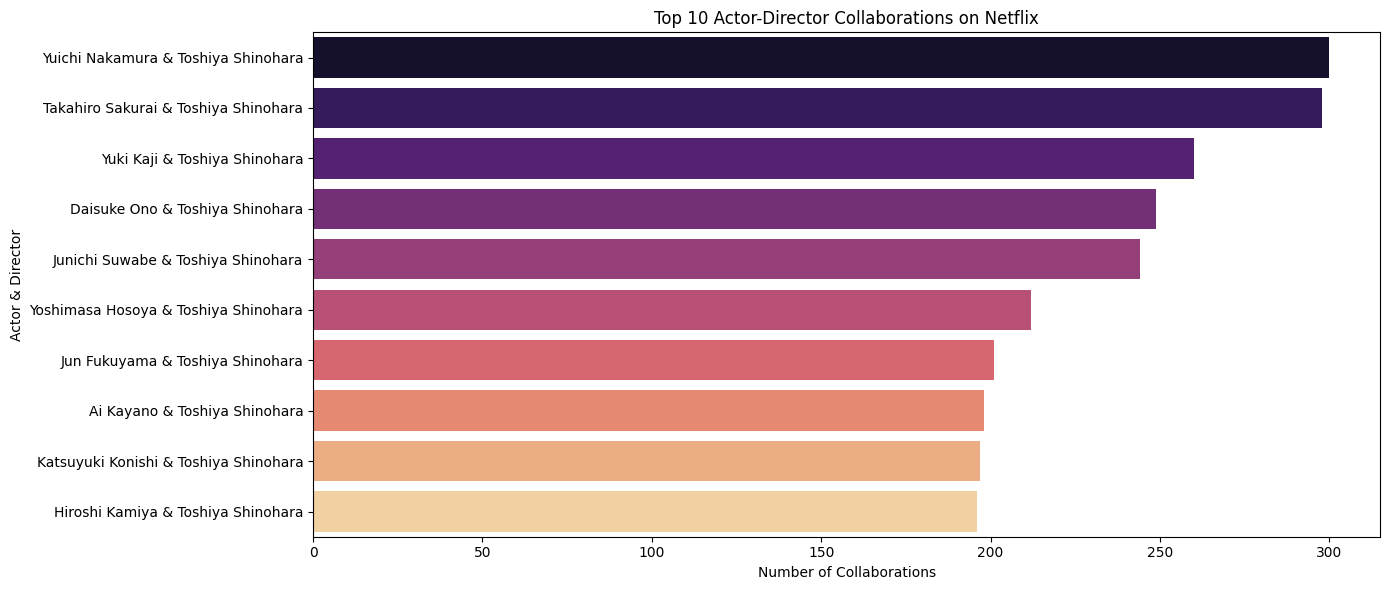

In [107]:
# Drop rows with missing 'cast' or 'director'
df_director_cast = dir_df.dropna(subset=["cast", "director"])

# Create a list from the 'cast' column
df_director_cast["list_of_cast"] = df_director_cast["cast"].apply(lambda x: str(x).split(", "))

# Explode the list so each actor gets a separate row
df_director_cast = df_director_cast.explode("list_of_cast")
df_director_cast["list_of_cast"] = df_director_cast["list_of_cast"].str.strip()

# Group by actor and director, and count the number of collaborations
actor_director_pair_counts = df_director_cast.groupby(['list_of_cast', 'director']).size().reset_index(name='count')

# Sort by the count in descending order
actor_director_pair_counts = actor_director_pair_counts.sort_values(by='count', ascending=False)

# Get the top 10 most frequent actor-director pairs
top_pairs = actor_director_pair_counts.head(10)

# Plotting
plt.figure(figsize=(14, 6))
sns.barplot(
    data=top_pairs,
    x='count',
    y=top_pairs['list_of_cast'] + " & " + top_pairs['director'],
    palette="magma"
)
plt.xlabel("Number of Collaborations")
plt.ylabel("Actor & Director")
plt.title("Top 10 Actor-Director Collaborations on Netflix")
plt.tight_layout()
plt.show()


In [108]:
cr1_df=or_df


In [109]:
cr_df['list_of_country']=cr_df['country'].apply(lambda x: str(x).split(', '))
cr_df=cr_df.explode('list_of_country')
cr_df['genre_list']=cr_df['listed_in'].apply(lambda x: str(x).split(', '))
cr_df=cr_df.explode('genre_list')
cr_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,n_added_year,list_of_genre,list_of_cast,list_of_country,genre_list
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,[Documentaries],[Unknown],United States,Documentaries
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,International TV Shows
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",South Africa,TV Dramas


# Top Countries which produced most Titles

In [110]:
count=cr_df.groupby('list_of_country')['title'].nunique().sort_values(ascending=False)
count.head(5)

,title
list_of_country,
United States,3689
India,1046
Unknown,831
United Kingdom,804
Canada,445


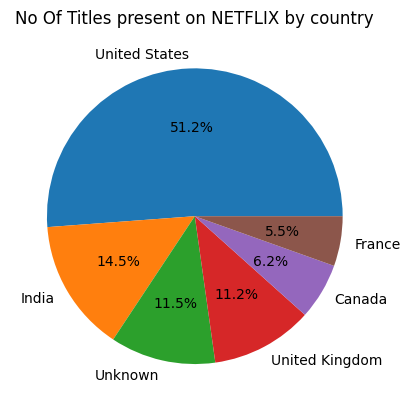

In [111]:
y=count.values[0:6]
label=count.index[0:6]
plt.pie(y,labels=label,autopct='%1.1f%%')
plt.title('No Of Titles present on NETFLIX by country')
plt.show()

In [112]:
top_10_country = cr_df.country.value_counts().head(10).index
df_new = cr_df.loc[cr_df['country'].isin(top_10_country)]

# Distrubution of Tv Shows and Movies on the basis of country.

In [113]:
x = df_new.groupby(['country' , 'type'])['show_id'].nunique().reset_index()
x.pivot(index = 'country' , columns = 'type' , values = 'show_id').sort_values('Movie',ascending = False)

type,Movie,TV Show
country,,
United States,2058,760
India,893,79
Unknown,440,391
United Kingdom,206,213
Canada,122,59
Spain,97,48
Japan,76,169
France,75,49
"United Kingdom, United States",63,12


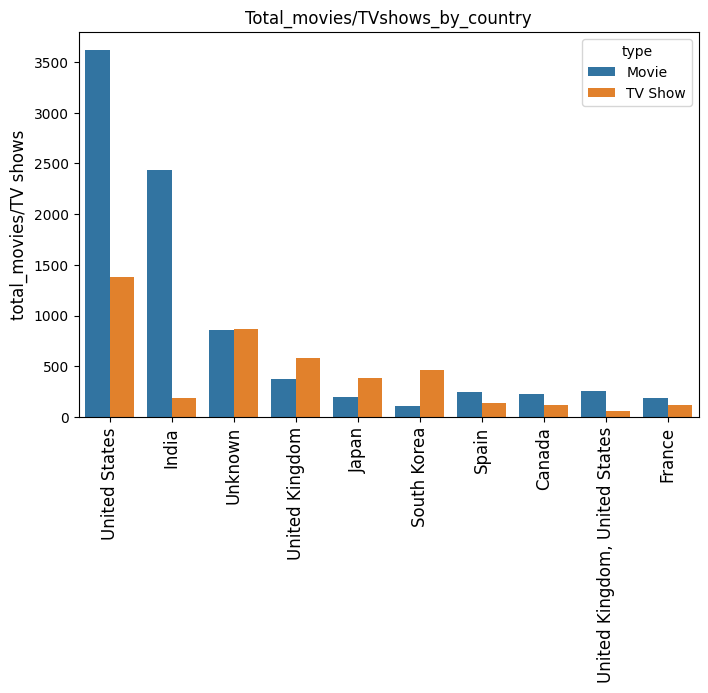

In [114]:
plt.figure(figsize= (8,5))
sns.countplot(data = df_new , x = 'country' , order = top_10_country , hue = 'type')
plt.xticks(rotation = 90 , fontsize = 12)
plt.ylabel('total_movies/TV shows' , fontsize = 12)
plt.xlabel('')
plt.title('Total_movies/TVshows_by_country')
plt.show()

Which Country produced most in which Director .We can see India tops the chart with International genre and not far there is Unites states in genre of Darama And Comedies

In [115]:
cr_df
#What kind of content do countries produce (e.g. Japan → Anime, US → Drama)?

a=cr_df.groupby(['list_of_country','genre_list'])['title'].nunique().sort_values(ascending=False)
top_10 = a.head(10).reset_index()
top_10

,list_of_country,genre_list,title
0,India,International Movies,864
1,United States,Dramas,835
2,United States,Comedies,680
3,India,Dramas,662
4,United States,Documentaries,511
5,United States,Action & Adventure,404
6,United States,Independent Movies,390
7,United States,Children & Family Movies,390
8,India,Comedies,323
9,United States,Thrillers,292


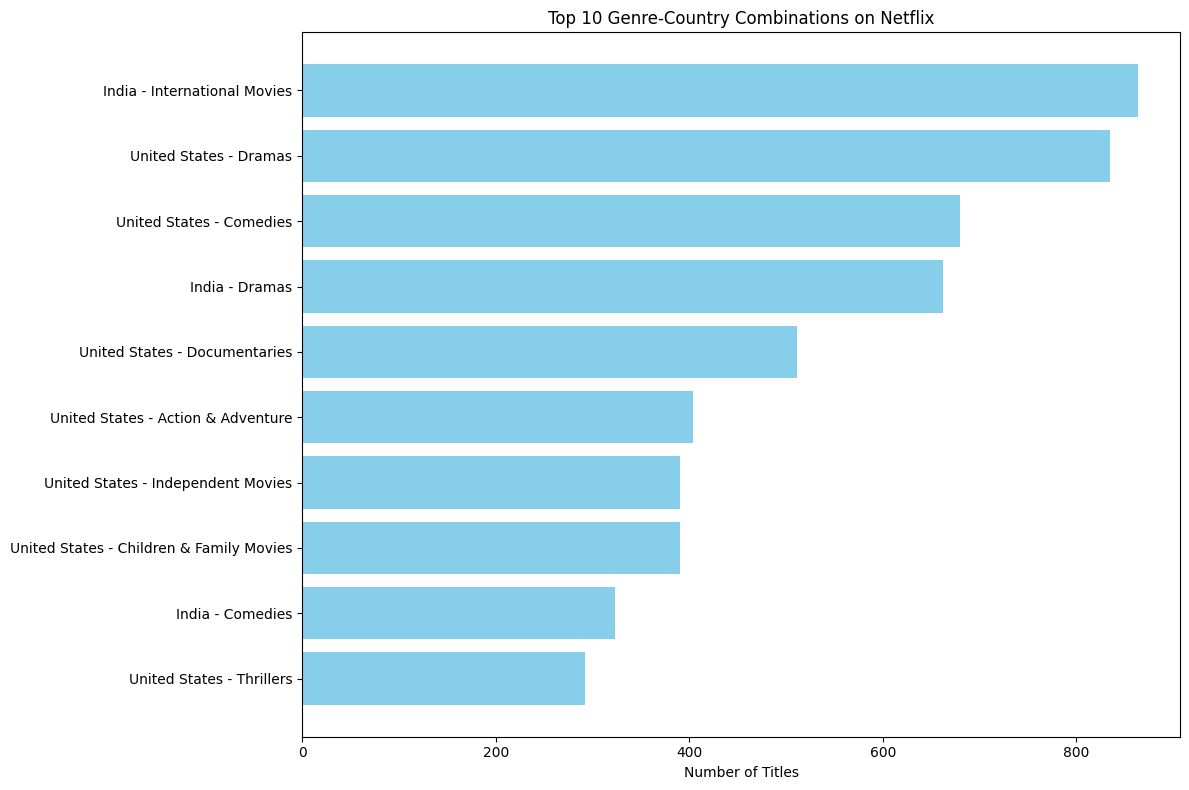

In [116]:
# Create a label combining country and genre for readability
top_10['label'] = top_10['list_of_country'] + ' - ' + top_10['genre_list']

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_10['label'], top_10['title'], color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Genre-Country Combinations on Netflix')
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()

Here is the Comparision of India and USA in which produced most in genre.We can tell that India produced in diverse Genre whereas USA is limited in top genre

<Figure size 1400x800 with 0 Axes>

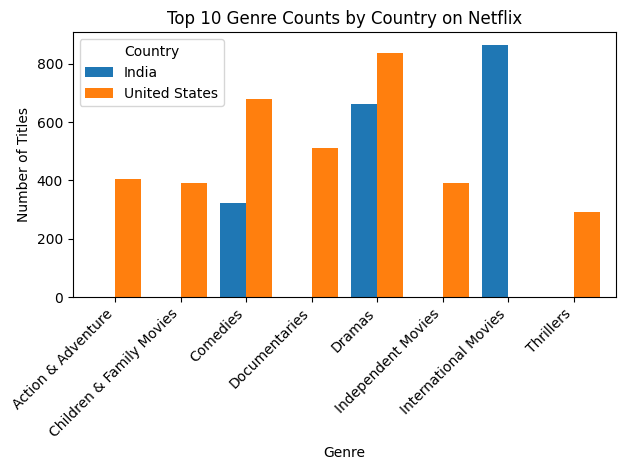

In [117]:
top_10 = a.head(10).reset_index()

pivot_df = top_10.pivot(index='genre_list', columns='list_of_country', values='title').fillna(0)

# Plot
plt.figure(figsize=(14, 8))
pivot_df.plot(kind='bar', width=0.8)
plt.title('Top 10 Genre Counts by Country on Netflix')
plt.xlabel('Genre')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Country')
plt.tight_layout()
plt.show()

In [118]:
condition = (cr_df['director'] == 'Rajiv Chilaka') & (cr_df['list_of_country'] == 'Unknown')
cr_df.loc[condition, 'list_of_country'] = 'India'

cr=cr_df.groupby(['list_of_country','director'])['title'].nunique().sort_values(ascending=False)
cr.head(10).reset_index()

,list_of_country,director,title
0,United States,Marcus Raboy,785
1,India,Rajiv Chilaka,428
2,United Kingdom,Edward Cotterill,211
3,Japan,Toshiya Shinohara,167
4,South Korea,Park Hoon-jung,152
5,India,David Dhawan,91
6,Canada,Justin G. Dyck,69
7,Taiwan,Brody Chu,63
8,Australia,Clay Glen,51
9,France,Thierry Donard,48


Most Number of titles produced by Director Country wise

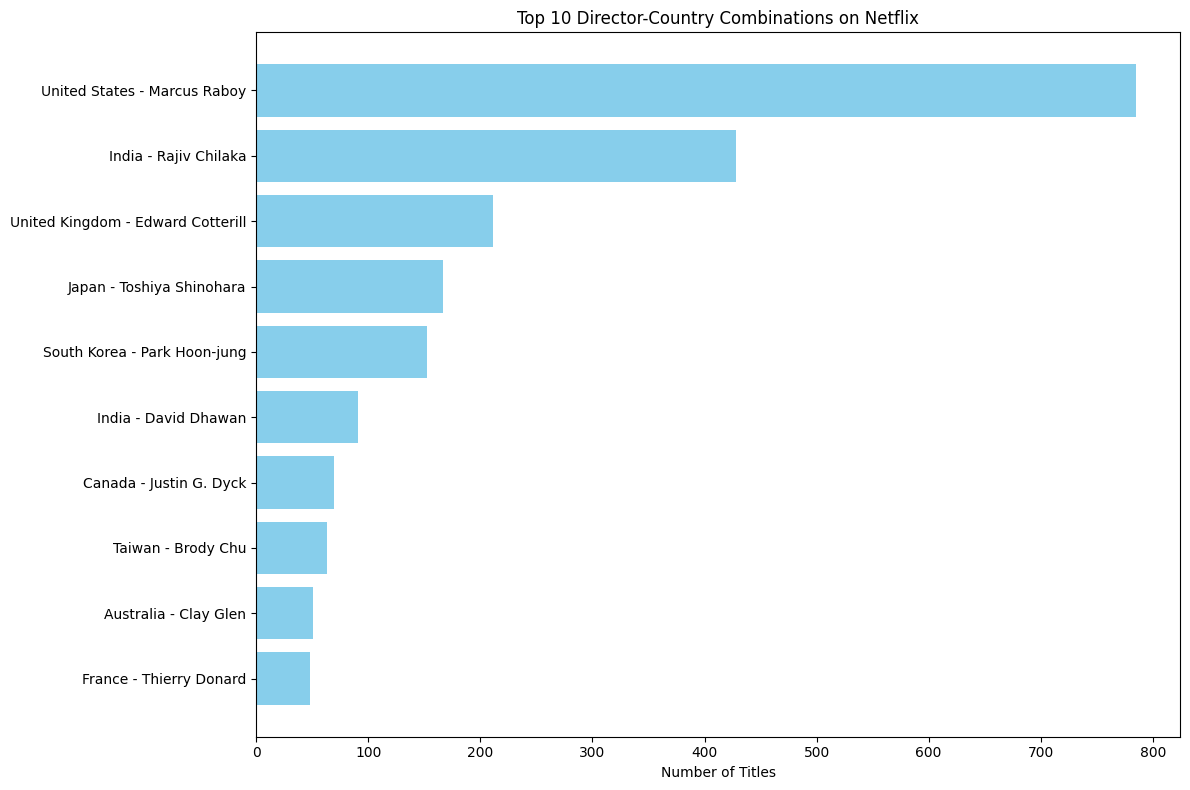

In [119]:
top_10=cr.head(10).reset_index()
top_10['label'] = top_10['list_of_country'] + ' - ' + top_10['director']

# Plot
plt.figure(figsize=(12, 8))
plt.barh(top_10['label'], top_10['title'], color='skyblue')
plt.xlabel('Number of Titles')
plt.title('Top 10 Director-Country Combinations on Netflix')
plt.gca().invert_yaxis()  # Highest value on top
plt.tight_layout()
plt.show()

# **🕒 Time-Based Analysis**


In [120]:
tb_df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,n_added_year,list_of_genre,list_of_cast,list_of_country
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021,[Documentaries],[Unknown],[United States]
1,s2,TV Show,Blood & Water,Adze Ugah,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021,"[International TV Shows, TV Dramas, TV Mysteries]","[Ama Qamata, Khosi Ngema, Gail Mabalane, Thaba...",[South Africa]
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021,"[Crime TV Shows, International TV Shows, TV Ac...","[Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nab...",[Unknown]


# Number of Titles Added to Netflix ,addition of Titles started from 2015 and peak was at 2019 and then there is decrease in released of Titles on Netflix

In [121]:
peak_year_added_netflix=tb_df.groupby(['n_added_year'])['title'].nunique().sort_values(ascending=False)
peak_year_added_netflix.head(3)

,title
n_added_year,
2019,2016
2020,1889
2018,1649


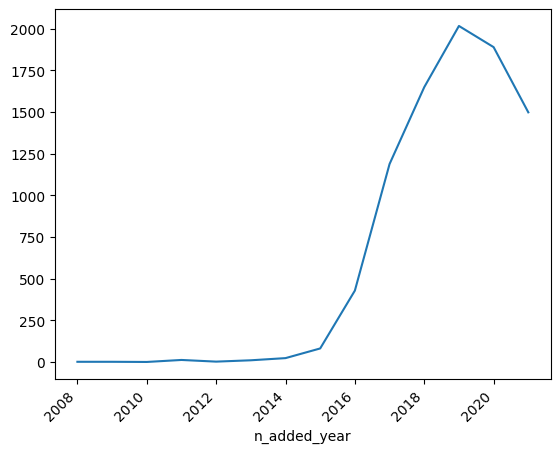

In [122]:
sns.lineplot(x=peak_year_added_netflix.index, y=peak_year_added_netflix.values)
plt.xticks(rotation=45, ha='right')
plt.show()

In [123]:
tb_df=tb_df.explode("list_of_country")
a=tb_df['list_of_country'].unique()

# The number of titles added to Netflix each year by country. The United States consistently added the most titles, peaking around 2019, followed by a decline. India and Japan show a growing trend, while the UK country have lower additions.

In [124]:
a=tb_df.groupby(['n_added_year','country'])['title'].nunique().sort_values(ascending=False)
a.head(10).reset_index()

,n_added_year,country,title
0,2019,United States,677
1,2020,United States,630
2,2018,United States,451
3,2021,United States,448
4,2017,United States,362
5,2021,Unknown,358
6,2018,India,333
7,2019,India,203
8,2020,India,189
9,2016,United States,159


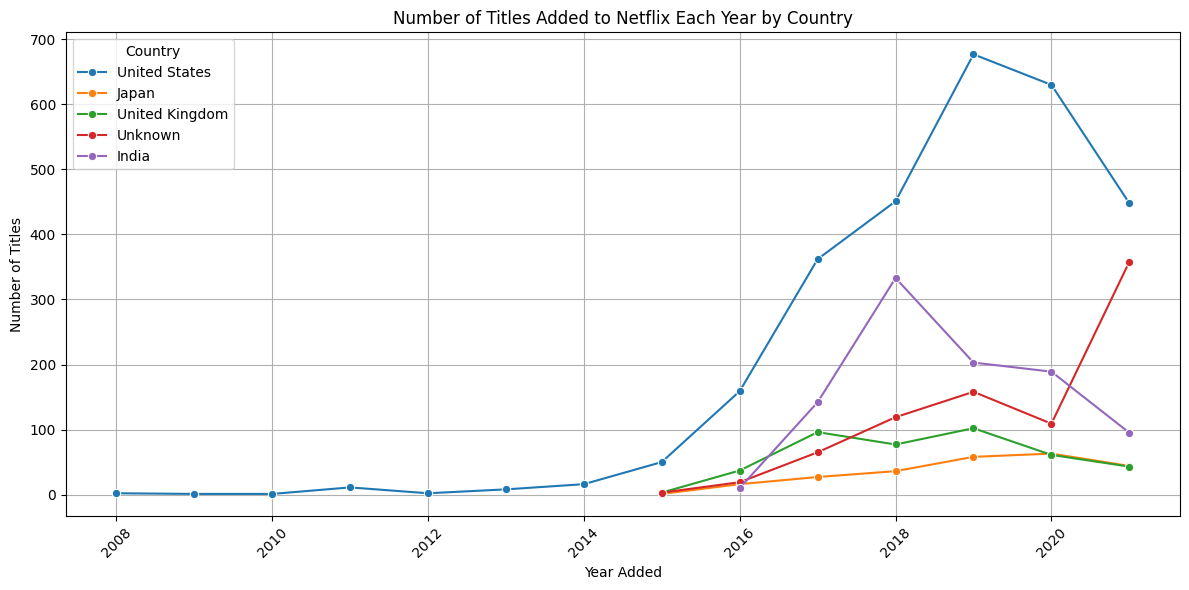

In [125]:

top_countries = tb_df['country'].value_counts().head(5).index
filtered_df = tb_df[tb_df['country'].isin(top_countries)]

# Group by year and country to count unique titles
grouped = filtered_df.groupby(['n_added_year', 'country'])['title'].nunique().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=grouped, x='n_added_year', y='title', hue='country', marker='o')
plt.title('Number of Titles Added to Netflix Each Year by Country')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Country')
plt.show()

# The total movies and TV shows released by year. Movie releases surged significantly after 2015, peaking around 2018, while TV show releases saw a steadier, lower increase, also rising notably after 2015.

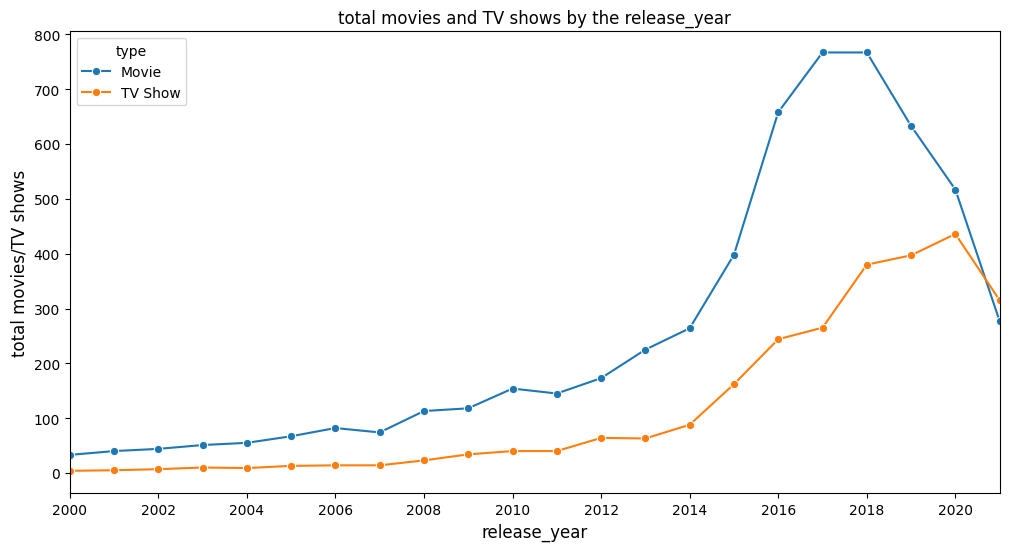

In [126]:
plt.figure(figsize = (12,6))
sns.lineplot(data =d , x = 'release_year' , y = 'total movies/TV shows' , hue = 'type' , marker = 'o'  , ms = 6 )
plt.xlabel('release_year' , fontsize = 12)
plt.ylabel('total movies/TV shows' , fontsize = 12)
plt.title('total movies and TV shows by the release_year' , fontsize = 12)
plt.xlim( left = 2000 , right = 2021)
plt.xticks(np.arange(2000 , 2021 , 2))
plt.show()


# The number of titles added to Netflix by year, separated by month (2, 4, 6, 8, 10, 12). Additions generally increased after 2015 across all shown months, with peak activity varying slightly by month around 2019-2020.

In [127]:
tb_df['months_add_n']=tb_df['date_added'].dt.month
month_year=tb_df.groupby(['months_add_n','n_added_year'])['title'].nunique().sort_values(ascending=False).reset_index()
month_year.head(10)

,months_add_n,n_added_year,title
0,7,2021,257
1,11,2019,255
2,1,2020,215
3,12,2019,215
4,6,2021,207
5,10,2019,193
6,10,2018,191
7,4,2021,188
8,12,2018,185
9,9,2021,183


Text(0.5, 1.0, 'Year and Month of Adding Shows on Netflix')

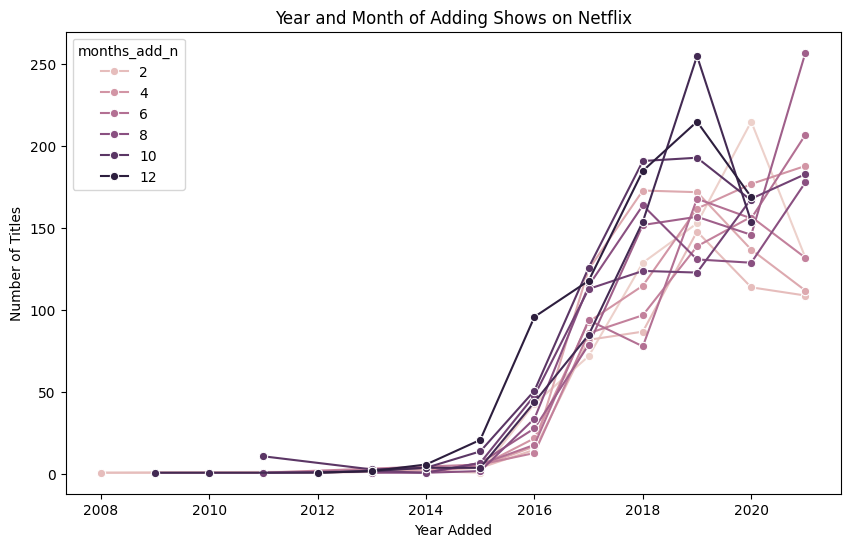

In [128]:
plt.figure(figsize = (10,6))
sns.lineplot(data=month_year, x = 'n_added_year', y = 'title', hue='months_add_n', marker='o')
plt.xlabel('Year Added')
plt.ylabel('Number of Titles')
plt.title('Year and Month of Adding Shows on Netflix')

Removing the error in Rating Count

In [133]:
df['rating'].value_counts()

,count
rating,
TV-MA,8025
TV-14,5254
R,2480
TV-PG,2017
PG-13,1567
PG,895
TV-Y7,525
TV-G,442
TV-Y,428


In [135]:
rt_df['rating'] = np.where(rt_df['rating'].isin(['74 min', '84 min', '66 min', 'missing']), 'UR', rt_df['rating'])

# The distribution of content ratings. TV-MA is the most frequent rating, followed by TV-14 and then R and TV-PG with similar counts. Ratings like UR, NC-17, and TV-Y7-FV have the fewest occurrences.

In [136]:
rt_df['rating'].value_counts()

,count
rating,
TV-MA,3211
TV-14,2160
TV-PG,863
R,799
PG-13,490
TV-Y7,334
TV-Y,307
PG,287
TV-G,220


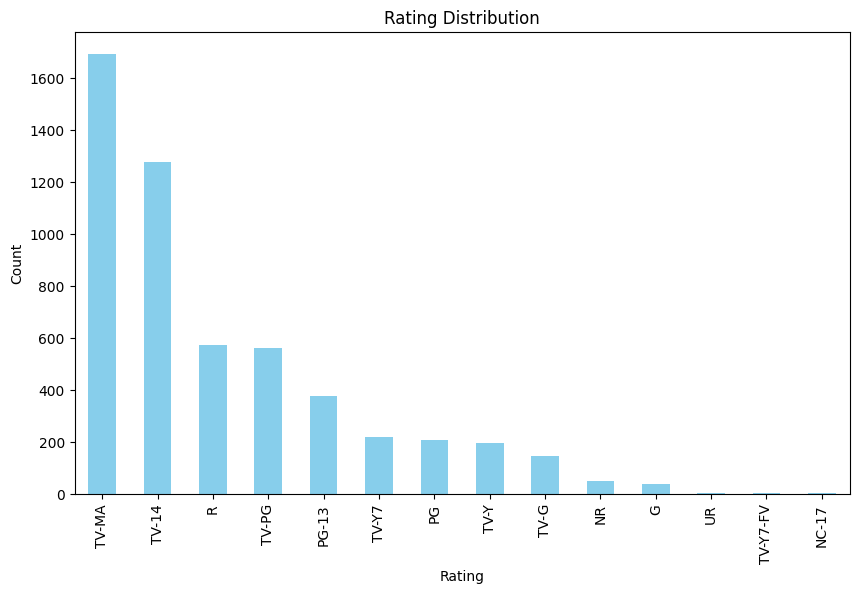

In [151]:
# Count the occurrences of each rating
rating_counts = filtered_df['rating'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
rating_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Rating Distribution')
plt.show()


# Rating distribution by content type. Movies dominate TV-MA and TV-14 ratings, while TV Shows have a significant presence in TV-MA. PG-13 has a notable number of movies, and other ratings have fewer entries for both types.

In [152]:
rt_df.groupby(['type','rating'])['title'].nunique().sort_values(ascending=False).reset_index()

,type,rating,title
0,Movie,TV-MA,2064
1,Movie,TV-14,1427
2,TV Show,TV-MA,1147
3,Movie,R,797
4,TV Show,TV-14,733
5,Movie,TV-PG,540
6,Movie,PG-13,490
7,TV Show,TV-PG,323
8,Movie,PG,287
9,TV Show,TV-Y7,195


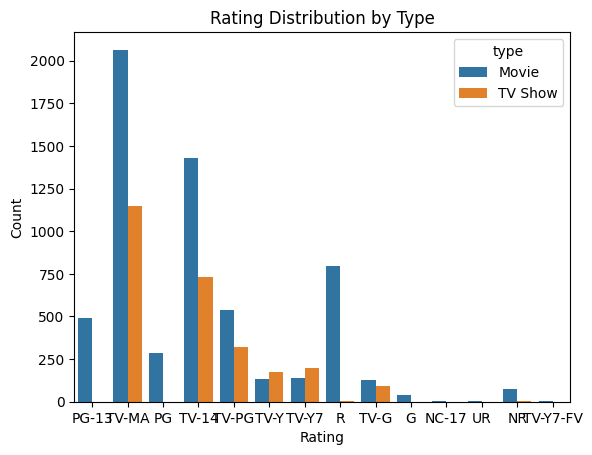

In [139]:
sns.countplot(data=rt_df, x='rating', hue='type')
plt.title('Rating Distribution by Type')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [141]:
rt_df['list_of_country']=rt_df['country'].apply(lambda x: str(x).split(', '))
rt_df=rt_df.explode('list_of_country')

# Rating-wise content count for the top 5 countries. The United States has the highest count for most ratings, especially TV-MA and TV-14. India shows a significant number of TV-14 rated titles

In [143]:
#Get top 5 countries by number of entries
top_countries = rt_df['country'].value_counts().head(5).index
#Filter rows where country is in top_countries
filtered_df = rt_df[rt_df['country'].isin(top_countries)]
# Group by rating and country, and count unique titles
grouped = filtered_df.groupby(['rating', 'list_of_country'])['title'].nunique().reset_index()
grouped = grouped.sort_values(by='title', ascending=False)
grouped.head(10)


,rating,list_of_country,title
28,TV-MA,United States,944
18,TV-14,India,550
16,R,United States,462
20,TV-14,United States,411
12,PG-13,United States,306
29,TV-MA,Unknown,277
32,TV-PG,United States,254
26,TV-MA,India,248
21,TV-14,Unknown,230
27,TV-MA,United Kingdom,193


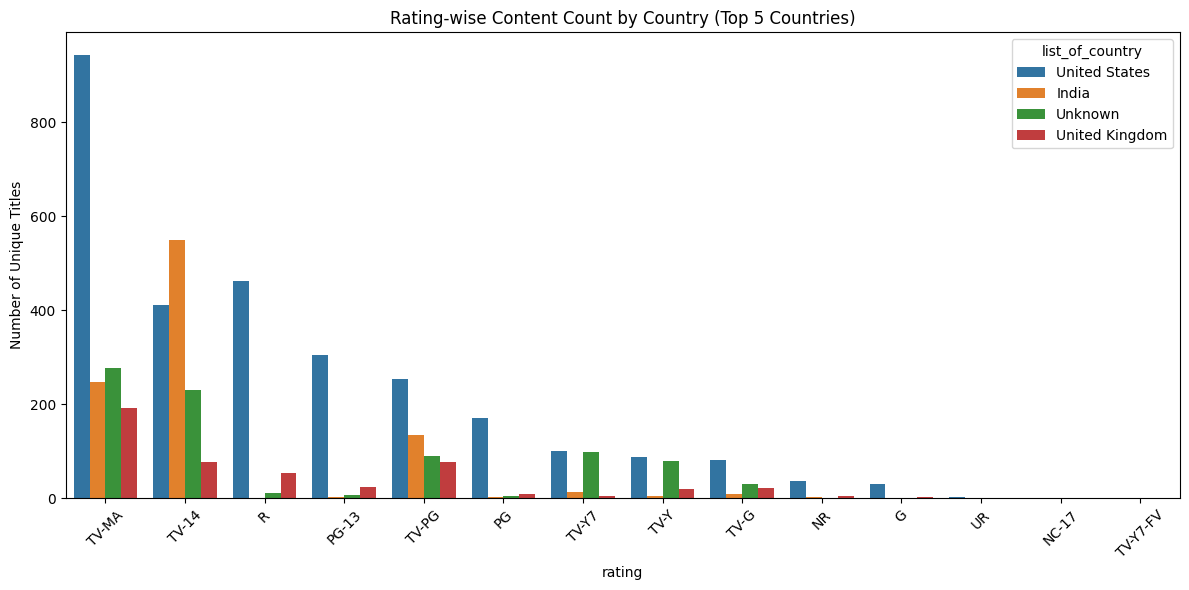

In [144]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='rating', y='title', hue='list_of_country')
plt.xticks(rotation=45)
plt.ylabel('Number of Unique Titles')
plt.title('Rating-wise Content Count by Country (Top 5 Countries)')
plt.tight_layout()
plt.show()

# Show rating distributions for TV Shows (left) and Movies (right). TV Shows are dominated by TV-MA, followed by TV-14 and TV-PG. Movies show a more diverse distribution, with TV-MA, R, and TV-14 being the most frequent ratings.

In [153]:
tv_shows = rt_df[rt_df['type'] == 'TV Show']
movies = rt_df[rt_df['type'] == 'Movie']


tv_rating_counts = tv_shows['rating'].value_counts(normalize=True) * 100
movie_rating_counts = movies['rating'].value_counts(normalize=True) * 100
print(tv_rating_counts, end="\n\n")
print(movie_rating_counts)

rating
TV-MA       39.020808
TV-14       22.594859
TV-PG       12.949816
TV-Y7       12.117503
TV-Y        10.330477
TV-G         2.790698
NR           0.122399
R            0.048960
TV-Y7-FV     0.024480
Name: proportion, dtype: float64

rating
TV-MA       29.022727
R           19.954545
TV-14       16.893939
PG-13       12.901515
TV-PG        7.143939
PG           6.598485
TV-Y7        1.666667
NR           1.613636
TV-G         1.560606
TV-Y         1.378788
G            1.030303
NC-17        0.083333
TV-Y7-FV     0.083333
UR           0.068182
Name: proportion, dtype: float64


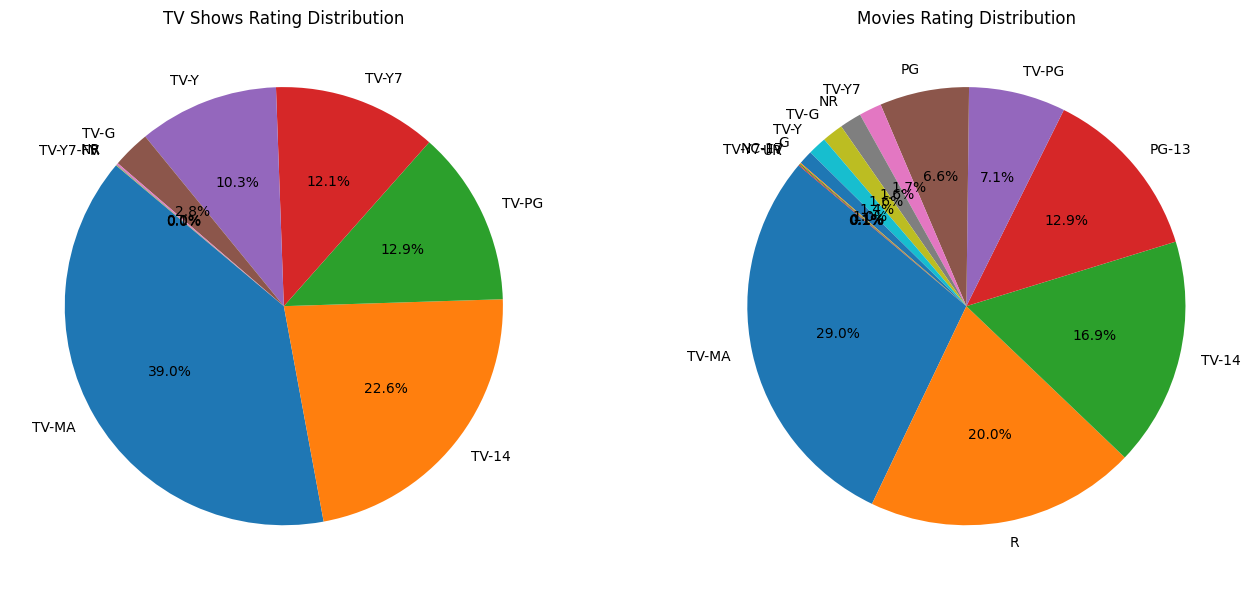

In [154]:
tv_shows = rt_df[rt_df['type'] == 'TV Show']
movies = rt_df[rt_df['type'] == 'Movie']

# Count of ratings for each type
tv_rating_counts = tv_shows['rating'].value_counts(normalize=True) * 100  # % values
movie_rating_counts = movies['rating'].value_counts(normalize=True) * 100  # % values

# Set up the plot
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Pie chart for TV Shows
axes[0].pie(tv_rating_counts, labels=tv_rating_counts.index, autopct='%1.1f%%', startangle=140)
axes[0].set_title('TV Shows Rating Distribution')

# Pie chart for Movies
axes[1].pie(movie_rating_counts, labels=movie_rating_counts.index, autopct='%1.1f%%', startangle=140)
axes[1].set_title('Movies Rating Distribution')

plt.tight_layout()
plt.show()

In [147]:
dir_rt=rt_df.groupby(['director','rating'])['title'].nunique().sort_values(ascending=False)
dir_rt.head(10)

director           rating
Marcus Raboy       TV-MA     325
                   TV-14     191
Rajiv Chilaka      TV-MA     139
Marcus Raboy       TV-PG     104
Rajiv Chilaka      TV-14     103
Edward Cotterill   TV-MA      86
Park Hoon-jung     TV-14      76
Toshiya Shinohara  TV-14      70
Marcus Raboy       TV-Y7      67
Rajiv Chilaka      TV-Y7      64
Name: title, dtype: int64

# The number of unique titles by rating for the top 4 countries. The United States has the most titles across various ratings, particularly TV-MA and TV-14. India shows a significant number of TV-14 and R-rated titles. The UK and Canada have fewer titles overall, with varying rating distributions.

In [158]:
rt_df=rt_df[rt_df['country']!='Unknown']
top_countries = rt_df['country'].value_counts().head(5).index
#Filter rows where country is in top_countries
filtered_df = rt_df[rt_df['country'].isin(top_countries)]
#Group by rating and country, and count unique titles
grouped = filtered_df.groupby(['rating', 'list_of_country'])['title'].nunique().reset_index()
grouped = grouped.sort_values(by='title', ascending=False)
grouped.head(10)

,rating,list_of_country,title
29,TV-MA,United States,952
19,TV-14,India,550
17,R,United States,475
21,TV-14,United States,416
13,PG-13,United States,314
33,TV-PG,United States,257
27,TV-MA,India,248
28,TV-MA,United Kingdom,193
9,PG,United States,181
31,TV-PG,India,134


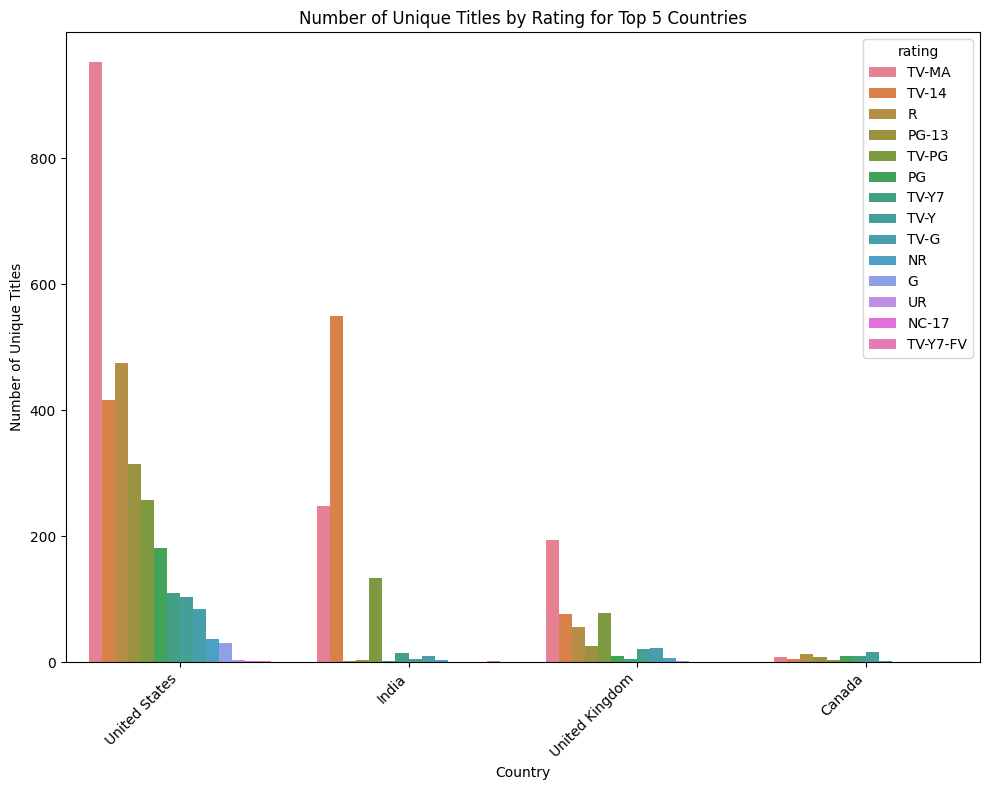

In [160]:
plt.figure(figsize=(10, 8))
sns.barplot(x='list_of_country', y='title', hue='rating', data=grouped)
plt.title('Number of Unique Titles by Rating for Top 5 Countries')
plt.xlabel('Country')
plt.ylabel('Number of Unique Titles')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# The rating-wise content count for the top 5 directors. Marcus Raboy has the highest number of titles across various ratings, especially TV-MA and TV-14. Rajiv Chilaka shows a significant number of TV-MA and TV-Y7 rated titles. Other directors have fewer titles distributed across different ratings.

In [149]:
valid_directors = rt_df[~rt_df['director'].isin(['Unknown']) & rt_df['director'].notna()]
top_dir=valid_directors['director'].value_counts().head(5).index
filter_df = rt_df[rt_df['director'].isin(top_dir)]

grouped=filter_df.groupby(['director','rating'])['title'].nunique().sort_values(ascending=False).reset_index()


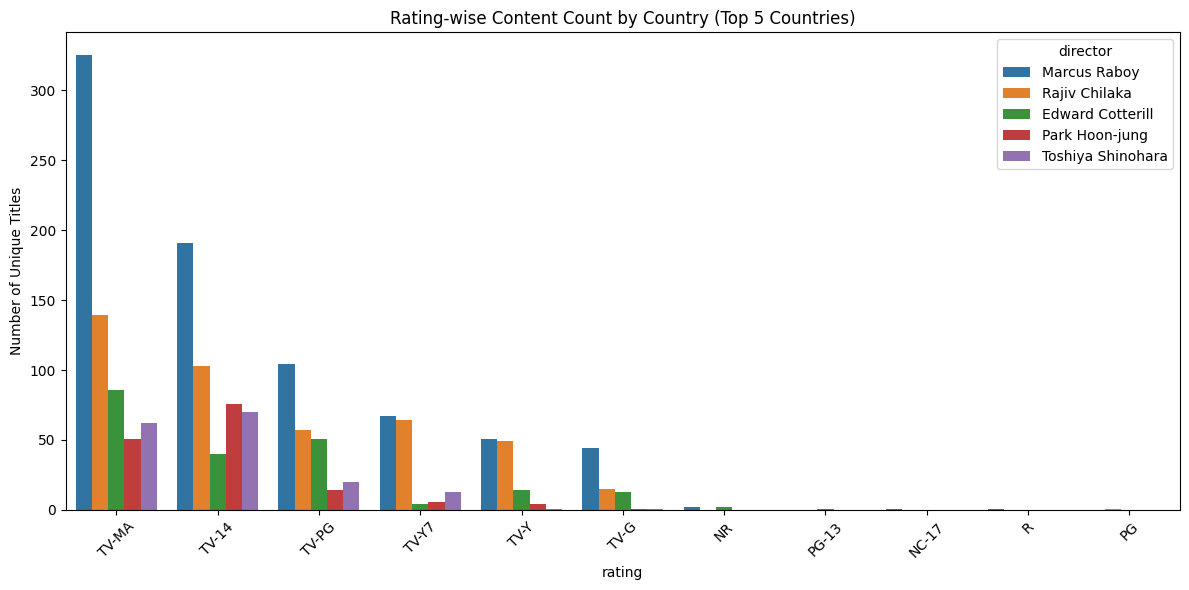

In [150]:
plt.figure(figsize=(12, 6))
sns.barplot(data=grouped, x='rating', y='title', hue='director')
plt.xticks(rotation=45)
plt.ylabel('Number of Unique Titles')
plt.title('Rating-wise Content Count by Country (Top 5 Countries)')
plt.tight_layout()
plt.show()

In [161]:
df.duration.value_counts()

,count
duration,
1 Season,3878
2 Seasons,1000
3 Seasons,507
93 min,430
96 min,398
...,...
8 min,1
190 min,1
10 min,1


In [162]:
tv_shows.duration.value_counts()

,count
duration,
1 Season,2541
2 Seasons,735
3 Seasons,368
4 Seasons,189
5 Seasons,101
7 Seasons,42
6 Seasons,39
10 Seasons,25
8 Seasons,20


# Insights

Around 70% content on Netflix is Movies and around 30% content is TV shows.
The movies and TV shows uploading on the Netflix started from the year 2008, It had very lesser content till 2014.

Year 2015 marks the drastic surge in the content getting uploaded on Netflix. It continues the uptrend since then and 2019 marks the highest number of movies and TV shows added on the Netflix.
Year 2020 and 2021 has seen the drop in content added on Netflix, possibly because of Pandemic. But still , TV shows content have not dropped as drastic as movies.
Since 2018, A drop in the movies is seen , but rise in TV shows is observed clearly. Being in continuous uptrend , TV shows surpassed the movies count in mid 2020. It shows the rise in popularity of tv shows in recent years.

Netflix has movies from variety of directors. Around 4993 directors have their movies or tv shows on Netflix.

Netflix has movies from total 122 countries, United States being the highset contributor with almost 37% of all the content.
The release year for shows is concentrated in the range 2005-2021.
50 mins - 150 mins is the range of movie durations, excluding potential outliers.
1-3 seasons is the range for TV shows seasons, excluding potential outliers.

Various ratings of content is avaialble on netfilx, for the various viewers categories like kids, adults , families. Highest number of movies and TV shows are rated TV-MA (for mature audiences).

Content in most of the ratings is available in lesser quanitity except in US. Ratings like TV-Y7 , TV-Y7 FV , PG ,TV-G , G , TV-Y , TV-PG are very less avaialble in all countries except US.

International Movies and TV Shows , Dramas , and Comedies are the top 3 genres on Netflix for both Movies and TV shows.

Mostly country specific popular genres are observed in each country. Only United States have a good mix of almost all genres. Eg. Korean TV shows (Korea), British TV Shows (UK), Anime features and Anime series (Japan) and so on.

Indian Actors have been acted in maximum movies on netflix. Top 5 actors are in India based on quantity of movies.

Shorter duration movies have been popular in last 10 years.



# Business Insights for Netflix Content Strategy:

Post-2000 Focus: Netflix's content library predominantly features titles released after the year 2000. Content from earlier periods is significantly limited, representing a potential gap in catering to audiences interested in classic cinema or television, such as senior citizens.

Dominance of Mature Audience Content: The majority of Netflix's content (over 80%) carries ratings targeting mature and adult viewers. This includes TV-MA (17+), TV-14 (14+), TV-PG (with similar classifications like PG-13 and PG), and R (restricted for under 17). The remaining 20% primarily caters to children under 13, indicating a current content focus on mature audiences and children with parental guidance.

Popular Genre Concentration: Key genres driving viewership on Netflix include International Movies and TV Shows, Dramas, Comedies, Action & Adventure, Children & Family Movies, and Thrillers. These represent core areas of audience engagement.

Geographic Content Concentration: A significant portion of Netflix's content (approximately 75%) originates from the top 10 producing countries. This leaves a substantial opportunity to expand content acquisition and production in other regions globally, potentially attracting new subscribers and diversifying the platform's offerings.

Preference for Shorter Form Content: There is a growing user preference for content with shorter durations, specifically movies ranging from 75 to 150 minutes and TV series with 1 to 3 seasons. This trend should be considered in future content production and acquisition strategies.

Pandemic-Related Content Dip: A noticeable decrease in content additions across all countries and content types occurred in 2020 and 2021, likely influenced by the global pandemic and its impact on production pipelines. This recent trend should be factored into forecasting and future content planning.

# Recommendations for Enhanced Netflix Content Strategy:

Diversify Genre Focus Beyond the US: While the current genre selection appears to align with the preferences of the US market, most other countries exhibit a narrower range of available genres. To maximize engagement and attract a broader audience globally, Netflix should proactively identify and invest in content across genres that are highly popular within specific regions.

Develop and Promote Country-Specific Genres: The success of Japanese Anime demonstrates the global appeal of culturally specific content. Netflix should explore the creation and promotion of more country-specific genres that resonate deeply with local audiences. For example, investing in Indian Mythological content could tap into a significant domestic market and potentially find international appeal.

Tailor Content Ratings to National Demographics: To optimize viewership and subscriber growth, Netflix should strategically align content ratings with the demographic profiles of individual countries. For instance, in a highly populous country like India, the current content focus on TV-MA, TV-14, and TV-PG ratings may be underserving significant age groups, particularly those below 14 and above 35. Producing a wider range of content suitable for these demographics could significantly expand the Indian subscriber base.

By implementing these recommendations, Netflix can move towards a more globally inclusive content strategy, catering to diverse audience preferences and unlocking significant growth potential in various international markets.






